In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_old=pd.read_csv('train_HK6lq50.csv')
df=pd.read_csv('data.csv')
df_test=pd.read_csv('test_wF0Ps6O.csv')

In [3]:
df.head()

,age,city_tier,data,difficulty_level,education,gender,id,is_handicapped,is_pass,program_duration,program_id,program_type,test_id,test_type,total_programs_enrolled,trainee_engagement_rating,trainee_id,trainee_id_pass_prob,trainee_id_with_100_percent_pass
0,24.0,3,train,2,2,M,9389_150,N,0.0,136,Y_1,Y,150,offline,5,1.0,9389,0.0,0
1,26.0,4,train,1,3,F,16523_44,N,1.0,131,T_1,T,44,offline,2,3.0,16523,1.0,1
2,40.0,1,train,1,2,M,13987_178,N,1.0,120,Z_2,Z,178,online,1,2.0,13987,1.0,1
3,NaN,3,train,1,2,F,13158_32,N,1.0,117,T_2,T,32,offline,4,1.0,13158,0.5,0
4,42.0,1,train,2,3,F,10591_84,N,1.0,131,V_3,V,84,offline,2,4.0,10591,1.0,0


In [7]:
from scipy.stats import chi2_contingency

In [8]:
def cramers_stat(x,y):
    table=pd.crosstab(x,y)
    chi2=chi2_contingency(table)[0]
    n=table.sum().sum()
    phi2=chi2/n
    r,k=table.shape
    phi2corr=max(0,phi2 - ((k-1)*(r-1))/(n-1))
    rcorr=r-((r-1)**2)/(n-1)
    kcorr=k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [9]:
cramers_stat(df['trainee_engagement_rating'],df['is_pass'])

0.1987012315127546

In [10]:
l1=list(df.select_dtypes('object').columns)

In [11]:
for i in l1:
    print(i)
    print(cramers_stat(df[i],df['is_pass']))
    print()

data
nan

gender
0.020007353594077237

id
nan

is_handicapped
0.03673001926479659

program_id
0.18651354769047343

program_type
0.15677809731597553

test_type
0.15147218554651973



In [12]:
l1[1]

'gender'

In [72]:
def catg_heatmap(dataset):
    columns = dataset.columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
                if i == j:
                    corr[columns[i]][columns[j]] = 1.0
                else:    
                    cell = cramers_stat(dataset[columns[i]],
                                                 dataset[columns[j]])
                                                 
                    corr[columns[i]][columns[j]] = cell
                    corr[columns[j]][columns[i]] = cell
    corr.fillna(0,inplace=True)                
    return corr 


catg_corr=catg_heatmap(data)

catg_corr

SyntaxError: invalid character in identifier (<ipython-input-72-958da9aa98d7>, line 4)

In [13]:
def featur_process(data):
    data['test_type']=data['test_type'].map({'offline':0,'online':1})
    data['gender']=data['gender'].map({'M':0,'F':1})
    data['is_handicapped']=data['is_handicapped'].map({'N':0,'Y':1})
    return data

In [14]:
new_df=featur_process(df)

In [15]:
new_df

,age,city_tier,data,difficulty_level,education,gender,id,is_handicapped,is_pass,program_duration,program_id,program_type,test_id,test_type,total_programs_enrolled,trainee_engagement_rating,trainee_id,trainee_id_pass_prob,trainee_id_with_100_percent_pass
0,24.0,3,train,2,2,0,9389_150,0,0.0,136,Y_1,Y,150,0,5,1.0,9389,0.0,0
1,26.0,4,train,1,3,1,16523_44,0,1.0,131,T_1,T,44,0,2,3.0,16523,1.0,1
2,40.0,1,train,1,2,0,13987_178,0,1.0,120,Z_2,Z,178,1,1,2.0,13987,1.0,1
3,NaN,3,train,1,2,1,13158_32,0,1.0,117,T_2,T,32,0,4,1.0,13158,0.5,0
4,42.0,1,train,2,3,1,10591_84,0,1.0,131,V_3,V,84,0,2,4.0,10591,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,22.0,2,test,2,1,1,18820_22,0,NaN,134,T_3,T,22,0,2,1.0,18820,0.5,0
104492,41.0,1,test,1,2,1,1641_96,0,NaN,133,V_1,V,96,0,2,3.0,1641,1.0,0
104493,NaN,2,test,1,4,0,7010_157,0,NaN,136,Y_1,Y,157,1,3,4.0,7010,1.0,0
104494,NaN,3,test,1,2,1,14895_179,0,NaN,136,Z_1,Z,179,0,1,1.0,14895,0.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 19 columns):
age                                 64976 non-null float64
city_tier                           104496 non-null int64
data                                104496 non-null object
difficulty_level                    104496 non-null int64
education                           104496 non-null int64
gender                              104496 non-null int64
id                                  104496 non-null object
is_handicapped                      104496 non-null int64
is_pass                             73147 non-null float64
program_duration                    104496 non-null int64
program_id                          104496 non-null object
program_type                        104496 non-null object
test_id                             104496 non-null int64
test_type                           104496 non-null int64
total_programs_enrolled             104496 non-null int64
trainee_engag

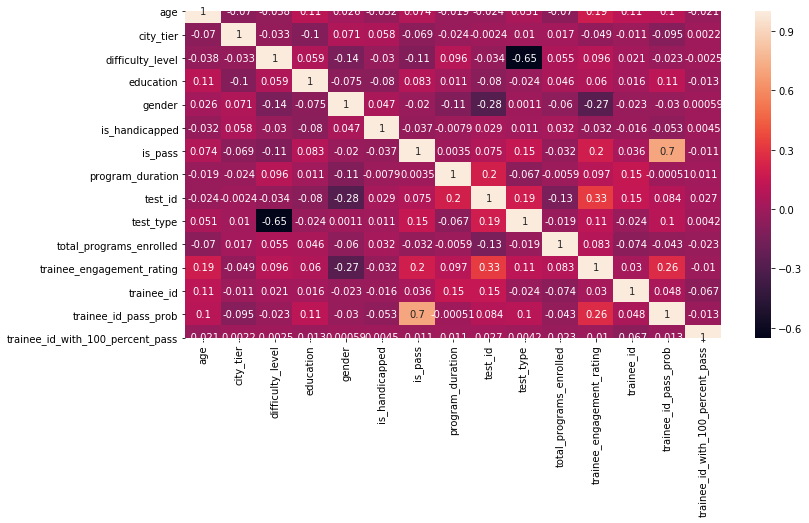

In [17]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [18]:
count=df.groupby(['trainee_id']).count()['test_id']

In [19]:
count=count.to_frame('no_of_exams_taken')

In [20]:
count

,no_of_exams_taken
trainee_id,
1,3
2,4
3,3
4,2
5,8
...,...
20094,5
20095,4
20096,5


In [21]:
df=df.merge(count,how='left',left_on='trainee_id',right_index=True)

In [22]:
df

,age,city_tier,data,difficulty_level,education,gender,id,is_handicapped,is_pass,program_duration,program_id,program_type,test_id,test_type,total_programs_enrolled,trainee_engagement_rating,trainee_id,trainee_id_pass_prob,trainee_id_with_100_percent_pass,no_of_exams_taken
0,24.0,3,train,2,2,0,9389_150,0,0.0,136,Y_1,Y,150,0,5,1.0,9389,0.0,0,5
1,26.0,4,train,1,3,1,16523_44,0,1.0,131,T_1,T,44,0,2,3.0,16523,1.0,1,2
2,40.0,1,train,1,2,0,13987_178,0,1.0,120,Z_2,Z,178,1,1,2.0,13987,1.0,1,5
3,NaN,3,train,1,2,1,13158_32,0,1.0,117,T_2,T,32,0,4,1.0,13158,0.5,0,5
4,42.0,1,train,2,3,1,10591_84,0,1.0,131,V_3,V,84,0,2,4.0,10591,1.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,22.0,2,test,2,1,1,18820_22,0,NaN,134,T_3,T,22,0,2,1.0,18820,0.5,0,1
104492,41.0,1,test,1,2,1,1641_96,0,NaN,133,V_1,V,96,0,2,3.0,1641,1.0,0,6
104493,NaN,2,test,1,4,0,7010_157,0,NaN,136,Y_1,Y,157,1,3,4.0,7010,1.0,0,8
104494,NaN,3,test,1,2,1,14895_179,0,NaN,136,Z_1,Z,179,0,1,1.0,14895,0.0,0,7


In [23]:
df[df['trainee_id']==9389]

,age,city_tier,data,difficulty_level,education,gender,id,is_handicapped,is_pass,program_duration,program_id,program_type,test_id,test_type,total_programs_enrolled,trainee_engagement_rating,trainee_id,trainee_id_pass_prob,trainee_id_with_100_percent_pass,no_of_exams_taken
0,24.0,3,train,2,2,0,9389_150,0,0.0,136,Y_1,Y,150,0,5,1.0,9389,0.0,0,5
49948,24.0,3,train,1,2,0,9389_154,0,0.0,136,Y_1,Y,154,1,5,1.0,9389,0.0,0,5
64716,24.0,3,train,3,2,0,9389_152,0,0.0,136,Y_1,Y,152,0,5,1.0,9389,0.0,0,5
76983,24.0,3,test,2,2,0,9389_149,0,NaN,136,Y_1,Y,149,0,5,1.0,9389,0.0,0,5
100371,24.0,3,test,3,2,0,9389_151,0,NaN,136,Y_1,Y,151,0,5,1.0,9389,0.0,0,5


In [24]:
df_test[df_test['trainee_id']==9389]

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
3836,9389_149,Y_1,Y,136,149,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0
27224,9389_151,Y_1,Y,136,151,offline,hard,9389,M,Matriculation,3,24.0,5,N,1.0


In [25]:
flag_fail=pd.crosstab(df['trainee_id'],df['is_pass'])[1].apply(lambda x:1 if(x==0) else 0)

In [26]:
flag_fail=flag_fail.to_frame('flag_fail')

In [27]:
df=df.merge(flag_fail,how='left',left_on='trainee_id',right_index=True)

In [28]:
df

,age,city_tier,data,difficulty_level,education,gender,id,is_handicapped,is_pass,program_duration,...,program_type,test_id,test_type,total_programs_enrolled,trainee_engagement_rating,trainee_id,trainee_id_pass_prob,trainee_id_with_100_percent_pass,no_of_exams_taken,flag_fail
0,24.0,3,train,2,2,0,9389_150,0,0.0,136,...,Y,150,0,5,1.0,9389,0.0,0,5,1.0
1,26.0,4,train,1,3,1,16523_44,0,1.0,131,...,T,44,0,2,3.0,16523,1.0,1,2,0.0
2,40.0,1,train,1,2,0,13987_178,0,1.0,120,...,Z,178,1,1,2.0,13987,1.0,1,5,0.0
3,NaN,3,train,1,2,1,13158_32,0,1.0,117,...,T,32,0,4,1.0,13158,0.5,0,5,0.0
4,42.0,1,train,2,3,1,10591_84,0,1.0,131,...,V,84,0,2,4.0,10591,1.0,0,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,22.0,2,test,2,1,1,18820_22,0,NaN,134,...,T,22,0,2,1.0,18820,0.5,0,1,NaN
104492,41.0,1,test,1,2,1,1641_96,0,NaN,133,...,V,96,0,2,3.0,1641,1.0,0,6,0.0
104493,NaN,2,test,1,4,0,7010_157,0,NaN,136,...,Y,157,1,3,4.0,7010,1.0,0,8,0.0
104494,NaN,3,test,1,2,1,14895_179,0,NaN,136,...,Z,179,0,1,1.0,14895,0.0,0,7,1.0


In [29]:
flag_pass=pd.crosstab(df['trainee_id'],df['is_pass'])[0].apply(lambda x:1 if(x==0) else 0)

In [30]:
flag_pass=flag_pass.to_frame('flag_pass')

In [31]:
df=df.merge(flag_pass,how='left',left_on='trainee_id',right_index=True)

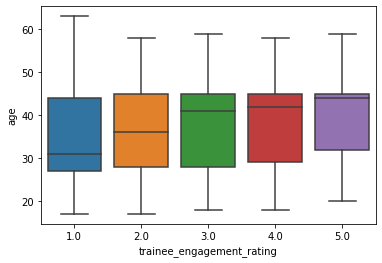

In [32]:
sns.boxplot(df['trainee_engagement_rating'],df['age'])

In [33]:
df.groupby(['program_type','trainee_engagement_rating']).agg({'age':['mean','median','max','min']})

age                   
                                             mean median   max   min
program_type trainee_engagement_rating                              
S            1.0                        35.397938   33.0  58.0  17.0
             2.0                        37.727494   40.0  58.0  18.0
             3.0                        42.137741   43.0  58.0  22.0
             4.0                        43.839506   44.0  58.0  24.0
             5.0                        47.024793   45.0  59.0  24.0
T            1.0                        35.764033   33.0  59.0  17.0
             2.0                        37.823275   42.0  54.0  19.0
             3.0                        39.569161   43.0  57.0  19.0
             4.0                        40.062762   43.0  56.0  23.0
             5.0                        42.463343   45.0  49.0  20.0
U            1.0                        33.548786   30.0  63.0  17.0
             2.0                        35.158779   31.0  57.0  17.0
             3.0                        38.424581   43.0  58.0  21.0
             4.0                        40.770508   44.0  58.0  20.0
             5.0                        40.681818   44.0  56.0  24.0
V            1.0                        32.794299   30.0  60.0  17.0
             2.0                        35.653265   31.0  58.0  18.0
             3.0                        38.638517   43.0  59.0  19.0
             4.0                        38.907361   43.0  57.0  22.0
             5.0                        42.595331   44.0  57.0  25.0
X            1.0                        32.604853   29.0  63.0  17.0
             2.0                        33.011194   29.0  57.0  17.0
             3.0                        33.799356   30.0  59.0  18.0
             4.0                        36.222621   34.0  58.0  18.0
             5.0                        38.819277   41.5  58.0  21.0
Y            1.0                        31.411200   29.0  63.0  17.0
             2.0                        33.049083   29.0  57.0  17.0
             3.0                        34.130956   30.0  51.0  21.0
             4.0                        37.044859   42.0  57.0  21.0
             5.0                        40.166295   44.0  58.0  22.0
Z            1.0                        36.210797   38.0  59.0  17.0
             2.0                        39.617401   43.0  54.0  21.0
             3.0                        41.853968   44.0  53.0  23.0
             4.0                        45.260870   45.0  56.0  41.0
             5.0                        41.615385   43.0  43.0  40.0

In [34]:
das=df.groupby(['program_type','trainee_engagement_rating']).agg({'age':['median']})

In [35]:
das.loc['S',1][0]

33.0

In [36]:
def fun1(data):
    progr_type=data['program_type']
    eng_rat=data['trainee_engagement_rating']
    age=data['age']
    if np.isnan(data['age']):
        return das.loc[progr_type,eng_rat][0]
    else:
        return age

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104496 entries, 0 to 104495
Data columns (total 22 columns):
age                                 64976 non-null float64
city_tier                           104496 non-null int64
data                                104496 non-null object
difficulty_level                    104496 non-null int64
education                           104496 non-null int64
gender                              104496 non-null int64
id                                  104496 non-null object
is_handicapped                      104496 non-null int64
is_pass                             73147 non-null float64
program_duration                    104496 non-null int64
program_id                          104496 non-null object
program_type                        104496 non-null object
test_id                             104496 non-null int64
test_type                           104496 non-null int64
total_programs_enrolled             104496 non-null int64
trainee_engag

In [38]:
df['age']=df.apply(lambda x:das.loc[x["program_type"],x["trainee_engagement_rating"]][0] if np.isnan(x["age"]) else x["age"],axis=1)

In [39]:
df.select_dtypes('object').columns

Index(['data', 'id', 'program_id', 'program_type'], dtype='object')

In [40]:
df.select_dtypes('object').columns

df=df.drop(['id'],axis=1)

df=pd.get_dummies(df,drop_first=True,columns=['program_id', 'program_type'])

df.shape

(104496, 46)

In [41]:
df.select_dtypes('object').columns

Index(['data'], dtype='object')

In [42]:
df

,age,city_tier,data,difficulty_level,education,gender,is_handicapped,is_pass,program_duration,test_id,...,program_id_Y_4,program_id_Z_1,program_id_Z_2,program_id_Z_3,program_type_T,program_type_U,program_type_V,program_type_X,program_type_Y,program_type_Z
0,24.0,3,train,2,2,0,0,0.0,136,150,...,0,0,0,0,0,0,0,0,1,0
1,26.0,4,train,1,3,1,0,1.0,131,44,...,0,0,0,0,1,0,0,0,0,0
2,40.0,1,train,1,2,0,0,1.0,120,178,...,0,0,1,0,0,0,0,0,0,1
3,33.0,3,train,1,2,1,0,1.0,117,32,...,0,0,0,0,1,0,0,0,0,0
4,42.0,1,train,2,3,1,0,1.0,131,84,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104491,22.0,2,test,2,1,1,0,NaN,134,22,...,0,0,0,0,1,0,0,0,0,0
104492,41.0,1,test,1,2,1,0,NaN,133,96,...,0,0,0,0,0,0,1,0,0,0
104493,42.0,2,test,1,4,0,0,NaN,136,157,...,0,0,0,0,0,0,0,0,1,0
104494,38.0,3,test,1,2,1,0,NaN,136,179,...,0,1,0,0,0,0,0,0,0,1


In [47]:
df_train=df[df['data']=='train']
df_train=df_train.drop(['data'],axis=1)

In [48]:
df_train.shape

(73147, 45)

In [49]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import catboost as cat
from sklearn.model_selection import cross_val_score

In [50]:
def baseliner(X,y, cv=3, metric='roc_auc'):
    """
    Function for baselining Models which return CV Score, Train Score, Valid Score
    """
    print("Baseliner Models\n")
    eval_dict = {}
    models = [lgb.LGBMClassifier(),
#               grid.best_estimator_,
#               rf_grid.best_estimator_,
              xgb.XGBClassifier(), 
              RandomForestClassifier(), 
              DecisionTreeClassifier()]
    print("Model Name \t |   CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, X, y, cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = results.mean()

        print("%s \t | %.4f \t" % (
            model_name[:12], eval_dict[model_name]['cv']))

In [51]:
X=df_train.drop(columns=["is_pass"])
y=df_train["is_pass"]

baseliner(X,y)

Baseliner Models

Model Name 	 |   CV
----------------------------------------------------------------------------------------------------
LGBMClassifi 	 | 0.9408 	
XGBClassifie 	 | 0.9373 	
RandomForest 	 | 0.9113 	
DecisionTree 	 | 0.7797 	


In [52]:
df_test=df[df['data']=='test']
df_test=df_test.drop(['data'],axis=1)

In [53]:
df_test.isnull().sum()

age                                     0
city_tier                               0
difficulty_level                        0
education                               0
gender                                  0
is_handicapped                          0
is_pass                             31349
program_duration                        0
test_id                                 0
test_type                               0
total_programs_enrolled                 0
trainee_engagement_rating               0
trainee_id                              0
trainee_id_pass_prob                    0
trainee_id_with_100_percent_pass        0
no_of_exams_taken                       0
flag_fail                            1347
flag_pass                            1347
program_id_S_2                          0
program_id_T_1                          0
program_id_T_2                          0
program_id_T_3                          0
program_id_T_4                          0
program_id_U_1                    

In [54]:
df_test=df_test.fillna(0.5)

In [55]:
df_test=df_test.drop(['is_pass'],axis=1)

In [56]:
model=lgb.LGBMClassifier()

In [57]:
model.fit(X,y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [59]:
pred=model.predict(df_test)

In [60]:
df_submission=pd.read_csv('sample_submission_vaSxamm.csv')

In [62]:
df_submission['is_pass']=pred

In [66]:
df_submission.to_csv('risout12.csv',index=False)